In [44]:
%matplotlib inline

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import astropy.units as u

In [46]:
mp.rcParams['figure.figsize'] = (12, 8)

In [47]:
ls /Users/abombrun/Documents/GitHub/StatClub

ALLwise QSO vizier.ipynb
Known lensed QSO Castles.ipynb
LICENSE
QSO DR1 errors and DR2 error model.ipynb
README.md
StrongLensDemo.ipynb
lensedQSO.csv
simDataSet0.csv.gzip
simDataSet1.csv.gzip


In [48]:
d = pd.read_csv("/Users/abombrun/Documents/GitHub/StatClub/simDataSet1.csv.gzip",compression='gzip')

with DR2 date one should take in account the correlation

In [49]:
d['mu'] = np.sqrt(np.power(d.pmra,2)+np.power(d.pmdec,2))
d['mu_error'] = np.sqrt(np.power(d.pmra_error,2)+np.power(d.pmdec_error,2))
d['mu_norm'] = d.mu/d.mu_error

In [50]:
d.groupby(d.type).mu.count()

type
LQSO       260
QSO     393907
STAR     23845
Name: mu, dtype: int64

In [51]:
d.groupby(d.type)['astrometric_pseudo_colour','phot_g_mean_mag','mu','mu_error','mu_norm'].median()

,astrometric_pseudo_colour,phot_g_mean_mag,mu,mu_error,mu_norm
type,,,,,
LQSO,1.581043,18.848915,0.178718,0.854287,0.210420
QSO,1.699810,19.238500,0.870961,1.079246,0.833535
STAR,1.599039,18.399000,10.793517,0.652178,18.409164


Text(0.5,0,'mu [mas/yr]')

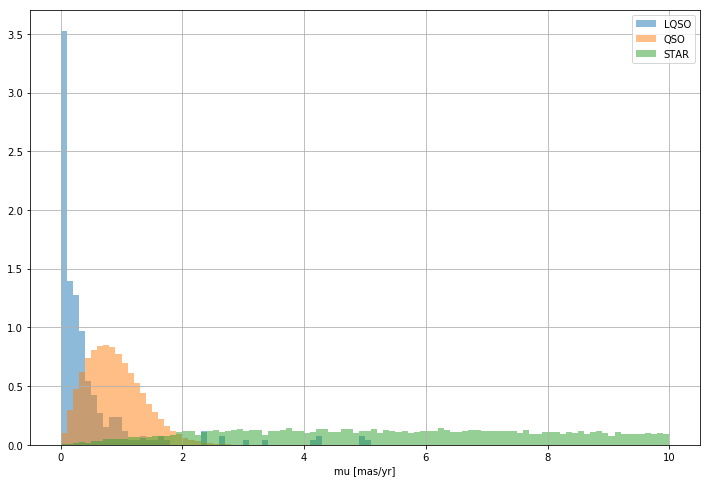

In [52]:
for k,g in d.groupby(d.type):
    g.mu_norm.hist(bins=100,alpha=0.5,range=(0,10),normed=True,label=k)
plt.legend()
plt.xlabel("mu [mas/yr]")

Text(0.5,0,'mu [mas/yr]')

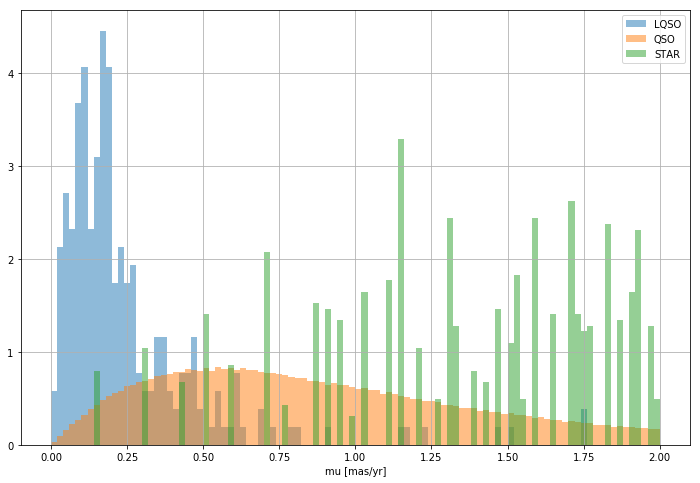

In [53]:
for k,g in d.groupby(d.type):
    g.mu.hist(bins=100,alpha=0.5,range=(0,2),normed=True,label=k)
plt.legend()
plt.xlabel("mu [mas/yr]")

Text(0.5,0,'g [mag]')

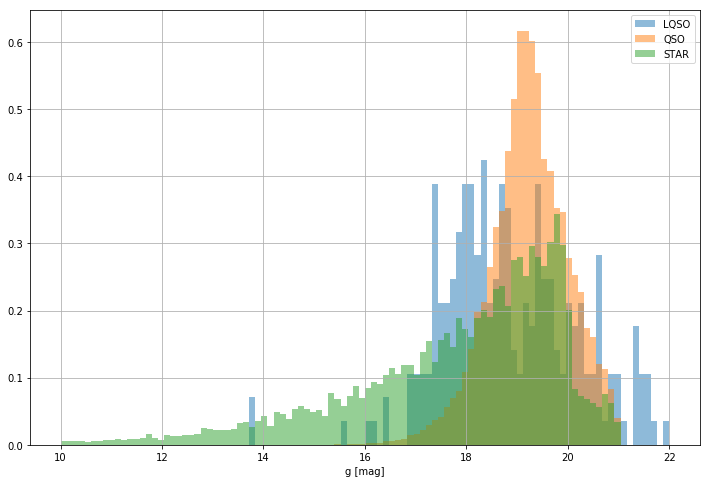

In [54]:
for k,g in d.groupby(d.type):
    g.phot_g_mean_mag.hist(bins=100,alpha=0.5,range=(10,22),normed=True,label=k)
plt.legend()
plt.xlabel("g [mag]")

Text(0.5,0,'mu / mu_error')

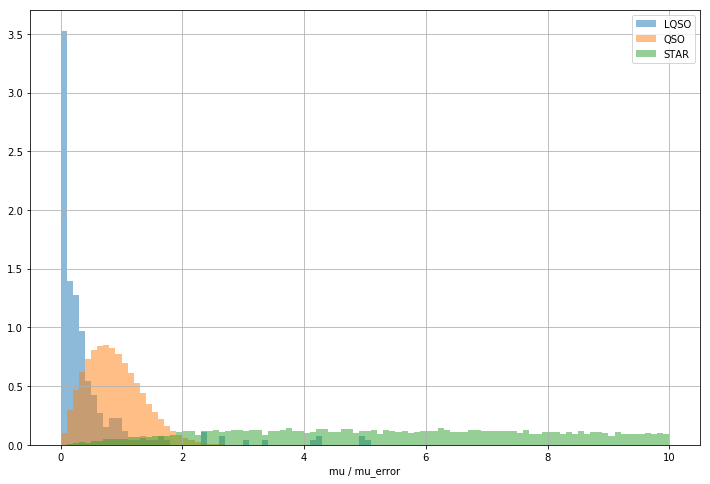

In [55]:
for k,g in d.groupby(d.type):
    g.mu_norm.hist(bins=100,alpha=0.5,range=(0,10),normed=True,label=k)
plt.legend()
plt.xlabel("mu / mu_error")

# LQSO

In [56]:
lensqsoid = np.unique(d[d.type=='LQSO'].qsoid.values)

In [57]:
s = d[d.qsoid==lensqsoid[0]]

In [58]:
s

,Unnamed: 0,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,source_id,astrometric_pseudo_colour,qsoid,type,mu,mu_error,mu_norm
417970,71014706070342570,54.708572,4.976409,26.643447,4.976409,0.334923,0.553871,0.088614,1.066333,0.054238,1.066333,19.796061,71014706070342570,1.752323,71014678174401274,LQSO,0.103895,1.508023,0.068895
417971,71014678174401274,54.709278,0.108465,26.642970,0.108465,-0.078974,0.111216,-1.161925,0.195389,-0.161454,0.195389,16.967743,71014678174401274,1.824906,71014678174401274,LQSO,1.173088,0.276321,4.245378


In [59]:
s.columns

Index(['Unnamed: 0', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'phot_g_mean_mag', 'source_id', 'astrometric_pseudo_colour', 'qsoid',
       'type', 'mu', 'mu_error', 'mu_norm'],
      dtype='object')

In [60]:
def plotGaiaLens(d,qsoid,r=(-5,5),pm=True,pmscale=1):
    s = d[d.qsoid==qsoid]
    x = (s.ra - s.ra.median())*u.deg.to(u.arcsecond)
    y = (s.dec - s.dec.median())*u.deg.to(u.arcsecond)
    plt.errorbar(x,y,xerr=s.ra_error, yerr=s.dec_error,fmt='.')
    plt.scatter(x,y,s=100*np.exp(20-s.phot_g_mean_mag),c=s.astrometric_pseudo_colour)
    plt.colorbar(label="nuEff")
    if pm : 
        vx = s.pmra*pmscale
        vy = s.pmdec*pmscale
        plt.quiver(x,y, vx, vy)#note the pm are in mas, angles='xy', scale_units='xy', scale=1)
        plt.errorbar(x+vx,y+vy,xerr=s.pmra_error, yerr=s.pmdec_error,fmt='o')
    plt.grid()
    plt.xlabel("gaia.ra - center [as]")
    plt.ylabel("gaia.dec - center [as]")
    plt.xlim(r)
    plt.ylim(r)

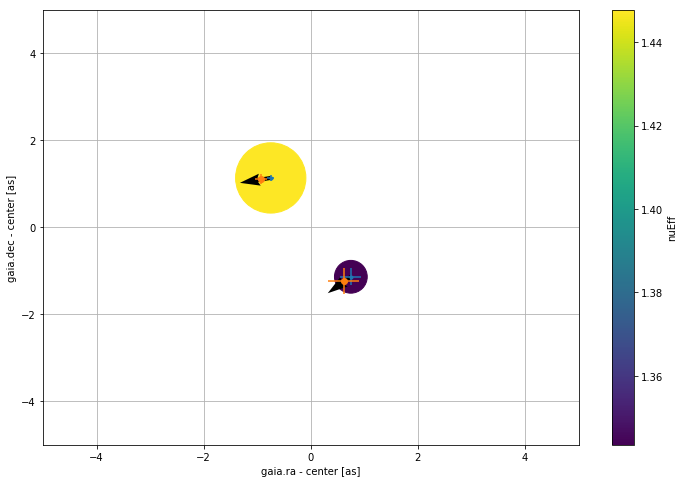

In [66]:
plotGaiaLens(d,lensqsoid[1])

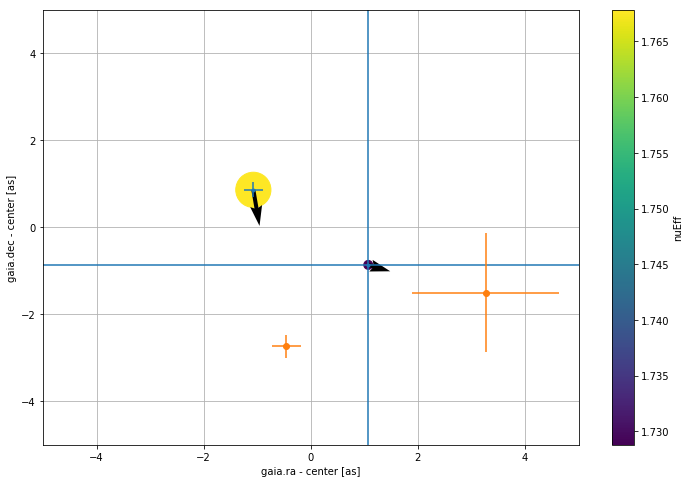

In [67]:
plotGaiaLens(d,lensqsoid[2],pmscale=20)

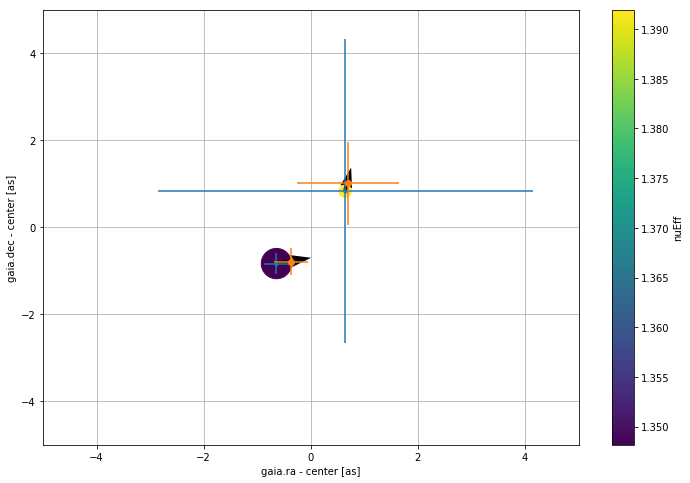

In [68]:
plotGaiaLens(d,lensqsoid[3],pmscale=2)

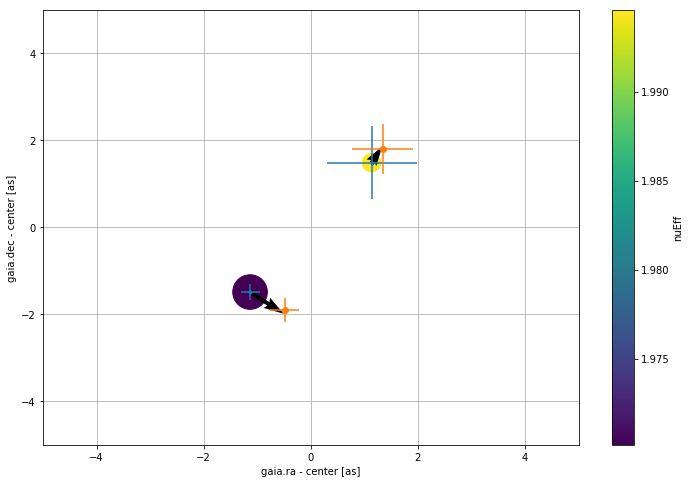

In [69]:
plotGaiaLens(d,lensqsoid[4],pmscale=2)

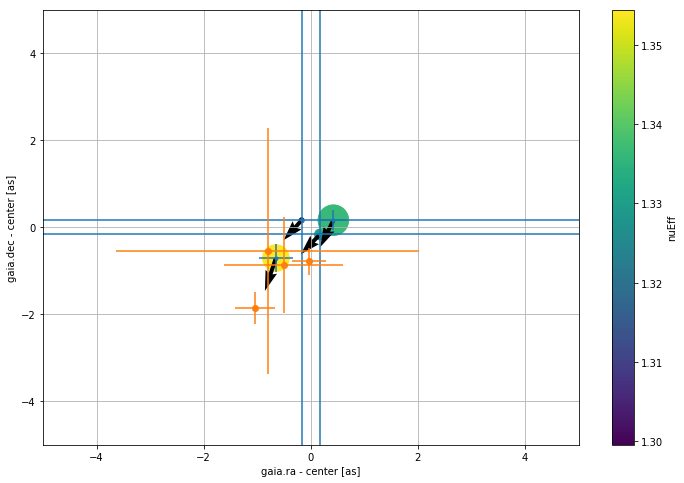

In [73]:
plotGaiaLens(d,lensqsoid[10],pmscale=5)

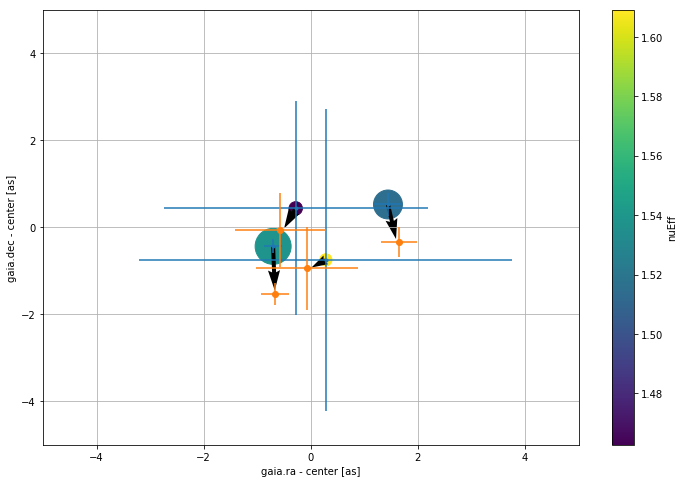

In [83]:
plotGaiaLens(d,lensqsoid[11],pmscale=10)

are we seeing all LQSOs?

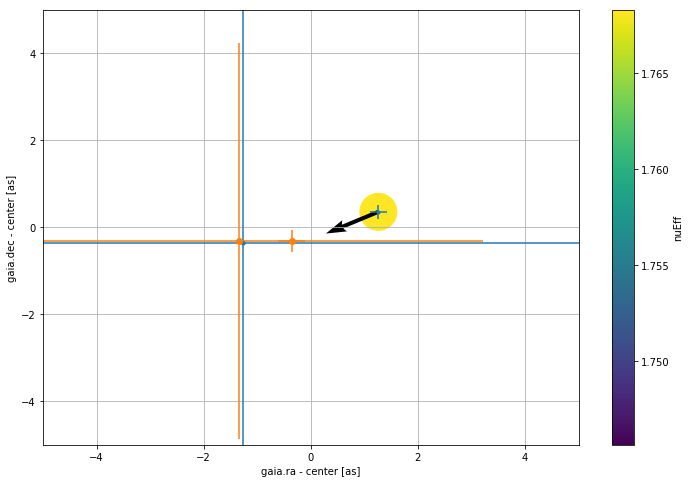

In [81]:
plotGaiaLens(d,lensqsoid[12],pmscale=1)

lens with the largest apparent proper motion

In [77]:
d[d.index==d[d.type=='LQSO'].mu.idxmax()].qsoid

417893    3613158920682365977
Name: qsoid, dtype: int64

/Users/abombrun/anaconda3/lib/python3.6/site-packages/matplotlib/quiver.py:650: RuntimeWarning: Mean of empty slice.
  amean = a.mean()
/Users/abombrun/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


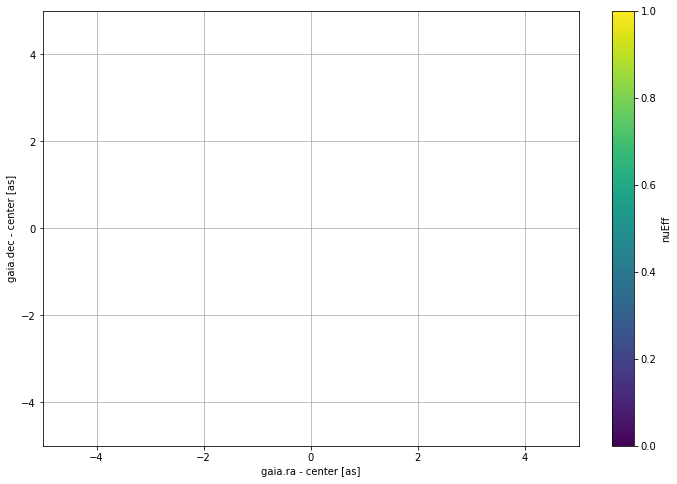

In [80]:
plotGaiaLens(d,4732918161983100968)